In [1]:
# Import nessessary packages and functions
import torch
import random

from pathlib import Path
from torchvision import datasets, transforms

from Utility.visualizer import single_image
from Utility.cnn_model import FashionMNISTModel


device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# Download Data from torchvision.datasets (So that we don't have to import main and train the model again... if already installed nothing will happen)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
class_names = train_data.classes

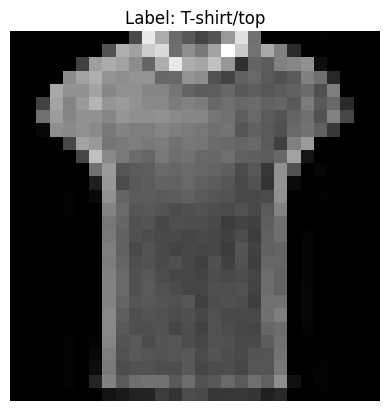

In [3]:
# Visualize a random image
random_idx = random.randint(0, len(train_data) - 1)
image, label = train_data[random_idx]
label = class_names[label]
single_image(image, label) # Visualize a random image from the training data

In [4]:
# Load Model for Evaluation & Visualization
MODEL_SAVE_PATH = Path("models/fashion_mnist_model.pth")

loaded_model = FashionMNISTModel(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)



FashionMNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)